In [3]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.datasets import fetch_openml

In [5]:
digit=fetch_openml("mnist_784")

In [6]:
digit.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [7]:
digit.target = digit.target.astype(np.int8)

In [8]:
digit.feature_names

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [9]:
x=digit.data[:900]
y=digit.target[:900]
trainX,testX,trainY,testY=train_test_split(x,y,test_size=0.2,random_state=12)

In [15]:
KValues = range(2, 30, 1)
testaccuracies = []
trainaccuracies = []
for k in range(2, 30, 1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainX, trainY)
    a1 = model.score(testX, testY)
    a2 = model.score(trainX, trainY)
    print("k=%d, test accuracy=%.2f%%" % (k, a1 * 100))
    print("k=%d, train accuracy=%.2f%%" % (k, a2 * 100))
    testaccuracies.append(a1)
    trainaccuracies.append(a2)
    
indtest = np.argmax(testaccuracies)
indtrain = np.argmax(trainaccuracies)
print("k=%d achieved highest test accuracy of %.2f%% on validation data" % (KValues[indtest],
testaccuracies[indtest] * 100))
print("k=%d achieved highest train accuracy of %.2f%% on validation data" % (KValues[indtrain],
trainaccuracies[indtrain] * 100))

k=2, test accuracy=88.89%
k=2, train accuracy=92.36%
k=3, test accuracy=85.00%
k=3, train accuracy=92.22%
k=4, test accuracy=88.33%
k=4, train accuracy=90.69%
k=5, test accuracy=86.67%
k=5, train accuracy=90.42%
k=6, test accuracy=86.11%
k=6, train accuracy=89.03%
k=7, test accuracy=86.67%
k=7, train accuracy=87.92%
k=8, test accuracy=87.22%
k=8, train accuracy=87.36%
k=9, test accuracy=86.67%
k=9, train accuracy=87.22%
k=10, test accuracy=86.11%
k=10, train accuracy=87.22%
k=11, test accuracy=86.67%
k=11, train accuracy=86.11%
k=12, test accuracy=86.11%
k=12, train accuracy=85.56%
k=13, test accuracy=85.56%
k=13, train accuracy=84.31%
k=14, test accuracy=86.67%
k=14, train accuracy=84.03%
k=15, test accuracy=86.67%
k=15, train accuracy=83.61%
k=16, test accuracy=86.11%
k=16, train accuracy=82.78%
k=17, test accuracy=86.67%
k=17, train accuracy=82.22%
k=18, test accuracy=85.56%
k=18, train accuracy=81.39%
k=19, test accuracy=86.11%
k=19, train accuracy=81.25%
k=20, test accuracy=85.56%

In [17]:
model = KNeighborsClassifier(n_neighbors=kValues[indtest])
model.fit(trainX, trainY)
predictions = model.predict(testX)
confusion_matrix(testY,predictions)


array([[15,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 18,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 16,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  1,  0, 13,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  2,  1,  0,  0,  1,  0, 17,  0,  0],
       [ 0,  0,  2,  1,  1,  1,  0,  0,  7,  0],
       [ 0,  0,  1,  0,  2,  0,  0,  1,  0, 15]], dtype=int64)

In [18]:
accuracy_score(testY,predictions)

0.8888888888888888

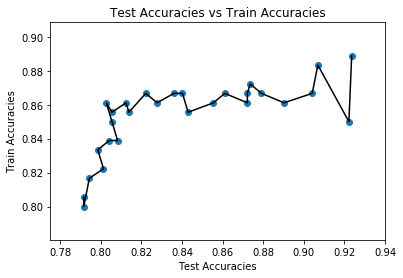

In [19]:
plt.scatter(trainaccuracies,testaccuracies)
plt.plot(trainaccuracies,testaccuracies,c="k")
plt.xlabel("Test Accuracies")
plt.ylabel("Train Accuracies")
plt.title("Test Accuracies vs Train Accuracies")
plt.show()